In [30]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_boston
import seaborn as sns

In [31]:
boston_dataset = load_boston()

In [32]:
len(boston_dataset.feature_names)

13

In [33]:
boston_dataset.data[:5]

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, 0.0000e+00, 5.3800e-01,
        6.5750e+00, 6.5200e+01, 4.0900e+00, 1.0000e+00, 2.9600e+02,
        1.5300e+01, 3.9690e+02, 4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, 0.0000e+00, 4.6900e-01,
        6.4210e+00, 7.8900e+01, 4.9671e+00, 2.0000e+00, 2.4200e+02,
        1.7800e+01, 3.9690e+02, 9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, 0.0000e+00, 4.6900e-01,
        7.1850e+00, 6.1100e+01, 4.9671e+00, 2.0000e+00, 2.4200e+02,
        1.7800e+01, 3.9283e+02, 4.0300e+00],
       [3.2370e-02, 0.0000e+00, 2.1800e+00, 0.0000e+00, 4.5800e-01,
        6.9980e+00, 4.5800e+01, 6.0622e+00, 3.0000e+00, 2.2200e+02,
        1.8700e+01, 3.9463e+02, 2.9400e+00],
       [6.9050e-02, 0.0000e+00, 2.1800e+00, 0.0000e+00, 4.5800e-01,
        7.1470e+00, 5.4200e+01, 6.0622e+00, 3.0000e+00, 2.2200e+02,
        1.8700e+01, 3.9690e+02, 5.3300e+00]])

In [34]:
boston = pd.DataFrame(boston_dataset.data,columns=boston_dataset.feature_names)

In [35]:
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [36]:
boston["MEDV"]=boston_dataset.target

In [37]:
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


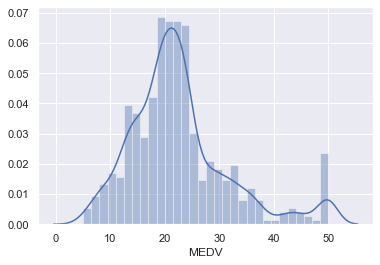

In [38]:
sns.distplot(boston.MEDV,bins=30)

# 選擇從INDUS到TAX做預測

In [39]:
X = boston.loc[:,"INDUS":"TAX"].values
Y = boston.MEDV

In [40]:
X[:3]

array([[  2.31  ,   0.    ,   0.538 ,   6.575 ,  65.2   ,   4.09  ,
          1.    , 296.    ],
       [  7.07  ,   0.    ,   0.469 ,   6.421 ,  78.9   ,   4.9671,
          2.    , 242.    ],
       [  7.07  ,   0.    ,   0.469 ,   7.185 ,  61.1   ,   4.9671,
          2.    , 242.    ]])

In [41]:
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.2,random_state=0)

In [42]:
len(x_train)

404

In [43]:
len(x_test)

102

In [44]:
model = LinearRegression()

In [45]:
model.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [46]:
y_predict = model.predict(x_test)

In [47]:
y_test

329    22.6
371    50.0
219    23.0
403     8.3
78     21.2
15     19.9
487    20.6
340    18.7
310    16.1
102    18.6
418     8.8
411    17.2
446    14.9
386    10.5
162    50.0
299    29.0
480    23.0
196    33.3
175    29.4
37     21.0
320    23.8
171    19.1
107    20.4
278    29.1
45     19.3
367    23.1
21     19.6
153    19.4
97     38.7
113    18.7
       ... 
65     23.5
344    31.2
481    23.7
387     7.4
233    48.3
206    24.4
90     22.6
497    18.3
239    23.3
137    17.1
407    27.9
224    44.8
225    50.0
326    23.0
96     21.4
426    10.2
159    23.3
391    23.2
54     18.9
435    13.4
254    21.9
300    24.8
505    11.9
246    24.3
374    13.8
56     24.7
455    14.1
60     18.7
213    28.1
108    19.8
Name: MEDV, Length: 102, dtype: float64

In [48]:
y_predict

array([26.69615521, 17.43915618, 26.58473007, 10.32627604, 22.34284394,
       20.82781116, 16.45886946, 22.6148013 , 17.79841515, 24.35623526,
       14.48544144, 20.48630513, 16.83886346,  5.15682995, 35.74800855,
       30.49213229, 18.14953111, 31.78983838, 30.18258654, 23.45125935,
       25.945857  , 17.42984735, 23.01624677, 29.0739179 , 22.13918736,
       -0.22590622, 20.05995327, 15.21108469, 38.96753205, 20.62669651,
       16.39557847, 15.20340007, 18.66078237, 21.19871304, 26.21570285,
       17.27570184, 14.86037603, 19.33760885, 18.67085183, 16.33580025,
       24.32535629, 22.93753191, 23.49369009, 10.82232894, 24.16241946,
       24.38635681, 18.12839654, 22.19455423,  9.66600914, 27.03201031,
       23.30743119, 22.07006101, 22.30224948, 37.55947276, 15.75724025,
       21.38241068, 20.65399163, 18.48140244, 14.01361457, 24.0171954 ,
       17.69861752, 22.97496669, 31.44826633, 30.11084834, 15.20499983,
       28.57093047, 18.86835969, 20.04858756, 21.98930828, 24.45

In [49]:
y_predict-y_test

329     4.096155
371   -32.560844
219     3.584730
403     2.026276
78      1.142844
15      0.927811
487    -4.141131
340     3.914801
310     1.698415
102     5.756235
418     5.685441
411     3.286305
446     1.938863
386    -5.343170
162   -14.251991
299     1.492132
480    -4.850469
196    -1.510162
175     0.782587
37      2.451259
320     2.145857
171    -1.670153
107     2.616247
278    -0.026082
45      2.839187
367   -23.325906
21      0.459953
153    -4.188915
97      0.267532
113     1.926697
         ...    
65      2.423279
344    -2.550414
481    -2.430109
387     0.987795
233    -9.525391
206     0.654425
90      5.075318
497     1.640249
239     3.424154
137     4.347687
407   -15.243621
224    -5.542203
225    -7.703012
326     2.735429
96      4.027580
426     6.635380
159    -2.480665
391    -7.360270
54     -0.103063
435     5.617724
254    -0.914371
300     1.822115
505    10.619503
246    -3.399116
374   -11.820432
56     -1.600192
455     4.541215
60     -1.4208

sns.set()

In [50]:
sns.set()

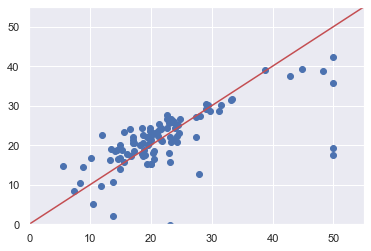

In [51]:
plt.scatter(y_test,y_predict)
plt.xlim(0,55)
plt.ylim(0,55)
plt.plot([0,55],[0,55],"r")